# P1: Staggered Leapfrog para una Onda Viajera

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import math
def st_lf(method = '.9'):
    N = 1000
    alpha = .9
    if method == '1.1':
        alpha = 1.1
    M = int(N/alpha)
    print('M =', M)
    dt = 1/M
    dx = 1/N
    vel = 1

    u = np.empty(N + 2)
    v = np.empty(N)
    v_theo = np.empty(N)
    s = np.empty(N + 2)
    r = np.empty(N + 2)
    x = np.empty(N)
    uf = np.empty(N)

    for i in range(N):
        x[i] = i * dx
        u[i + 1] = np.sin(x[i] * 2 * math.pi)
        v[i] = u[i + 1]
        
    u[0] = u[N]
    u[N + 1] = u[1]

    for i in range(N):
        s[i + 1] = - (u[i + 1] - u[i])/dt 
        r[i + 1] = (u[i + 1] - u[i])/dx

    s[0] = s[N]
    s[N + 1] = s[1]
    r[0] = r[N]
    r[N + 1] = r[1]

    for i in range(N):
        s[i + 1] = s[i + 1] + 0.5*alpha*(r[i + 1] - r[i])

    for j in range(M + 1):

        for i in range(N):
            v[i] = v[i] + (alpha/N)*s[i + 1]
        if method == '1.1':
            if j == 30:
                plt.figure(figsize=(10,10))
                plt.xlabel('$x$')
                plt.ylabel('$y$')
                plt.ylim(-1.4,1.4)
                plt.plot(x, v, color = 'blue', label = 'Numérico')
                for k in range(N):
                    v_theo[k] = np.sin(2*math.pi*(k/N - j/M))        
                plt.plot(x, v_theo, color = 'red', linestyle = 'dashed', label = 'Teórico')
                plt.title(rf'Onda Viajera en instante $\hat{{t}} = {j/M:.4f}$')
                plt.legend()
                plt.show()

                break
        
        if method == '.9' and j in (0, int(M/2), M):
            plt.figure(figsize=(10,10))
            plt.xlabel('$x$')
            plt.ylabel('$y$')
            plt.ylim(-1.4,1.4)
            plt.plot(x, v, color = 'blue', label = 'Numérico')
            for k in range(N):
                v_theo[k] = np.sin(2*math.pi*(k/N - j/M))        
            plt.plot(x, v_theo, color = 'red', linestyle = 'dashed', label = 'Teórico')
            plt.title(rf'Onda Viajera en instante $\hat{{t}} = {j/M:.4f}$')
            plt.legend()
            plt.show()
        
        for i in range(N):
            r[i + 1] = r[i + 1] + alpha*(s[i + 2] - s[i+1])
            s[i + 1] = s[i + 1] + alpha*(r[i + 1] - r[i])

        s[0] = s[N]
        s[N + 1] = s[1]
        r[0] = r[N]
        r[N + 1] = r[1]

M = 1111


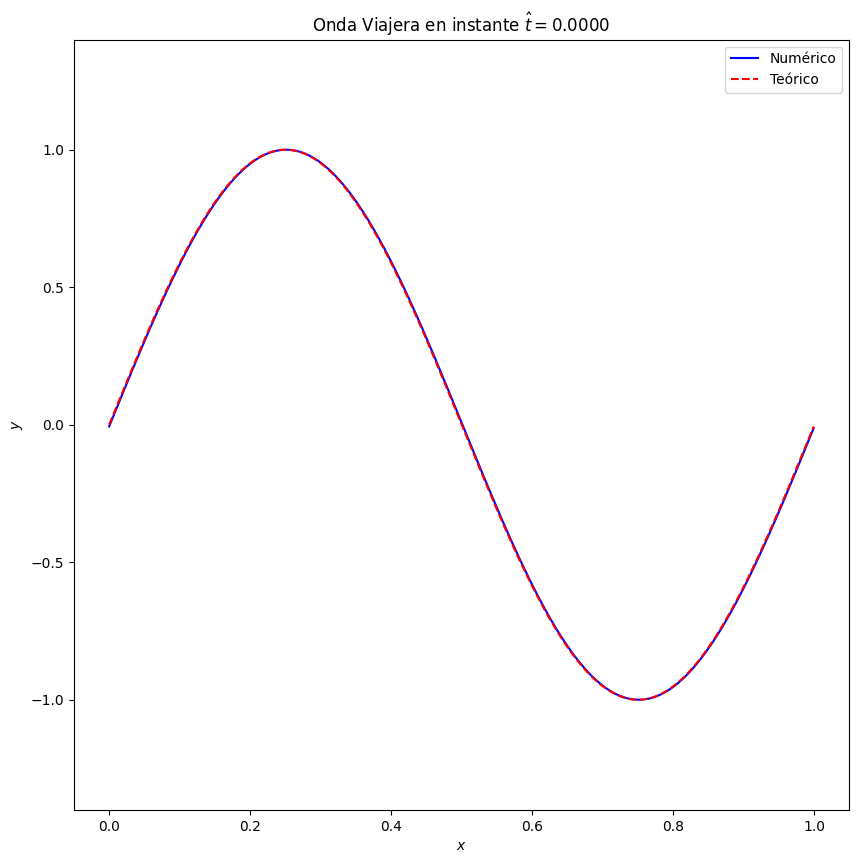

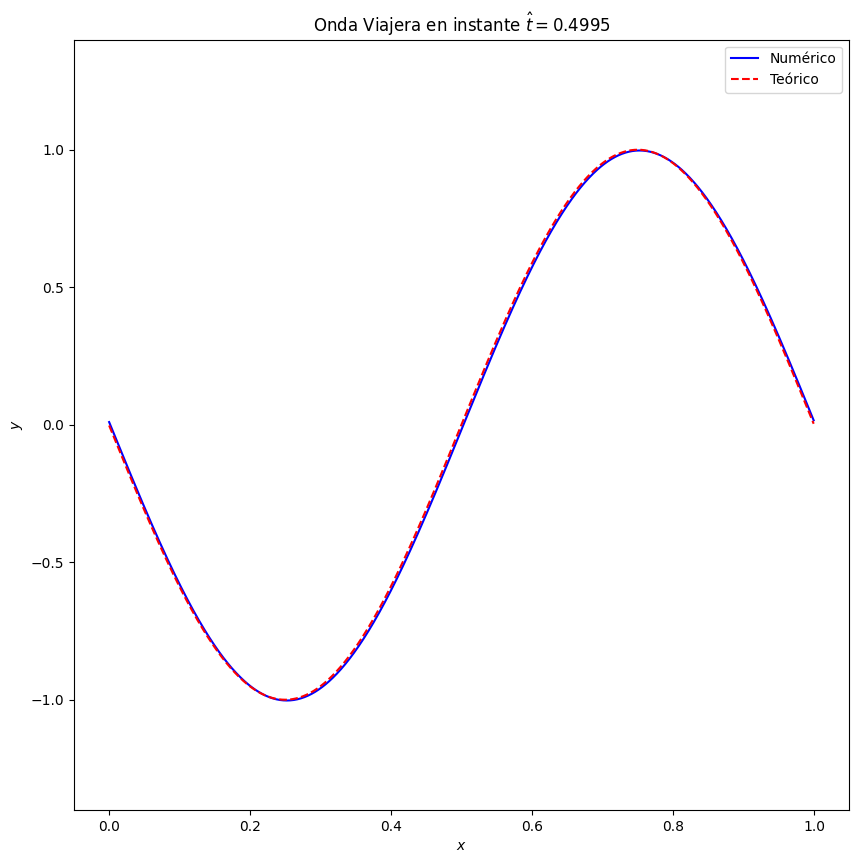

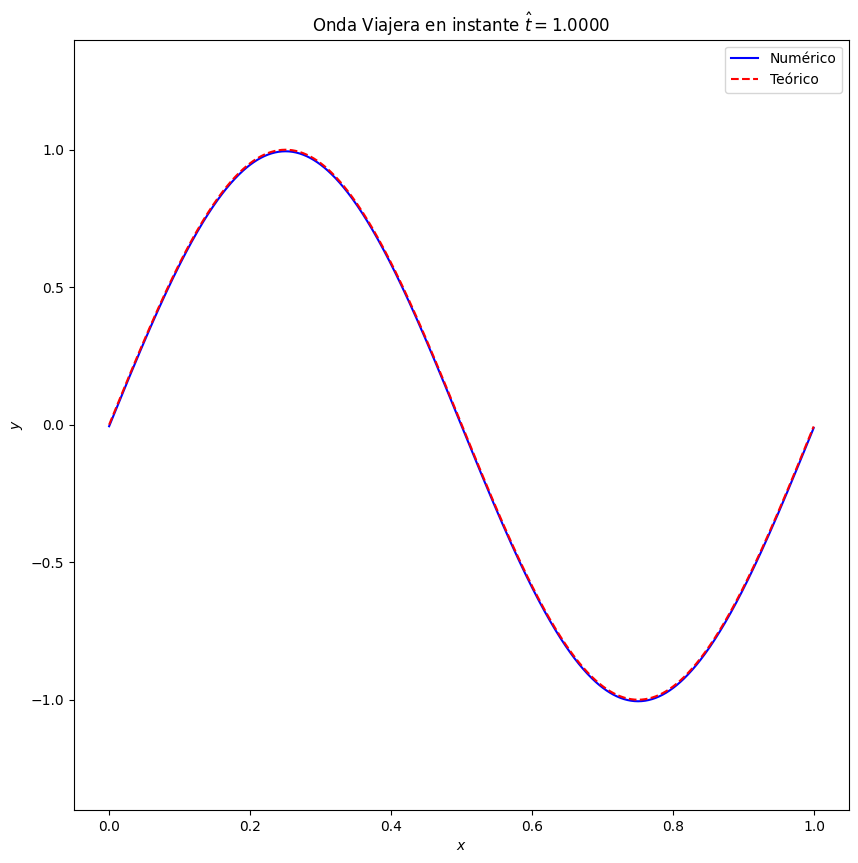

In [43]:
st_lf()

M = 909


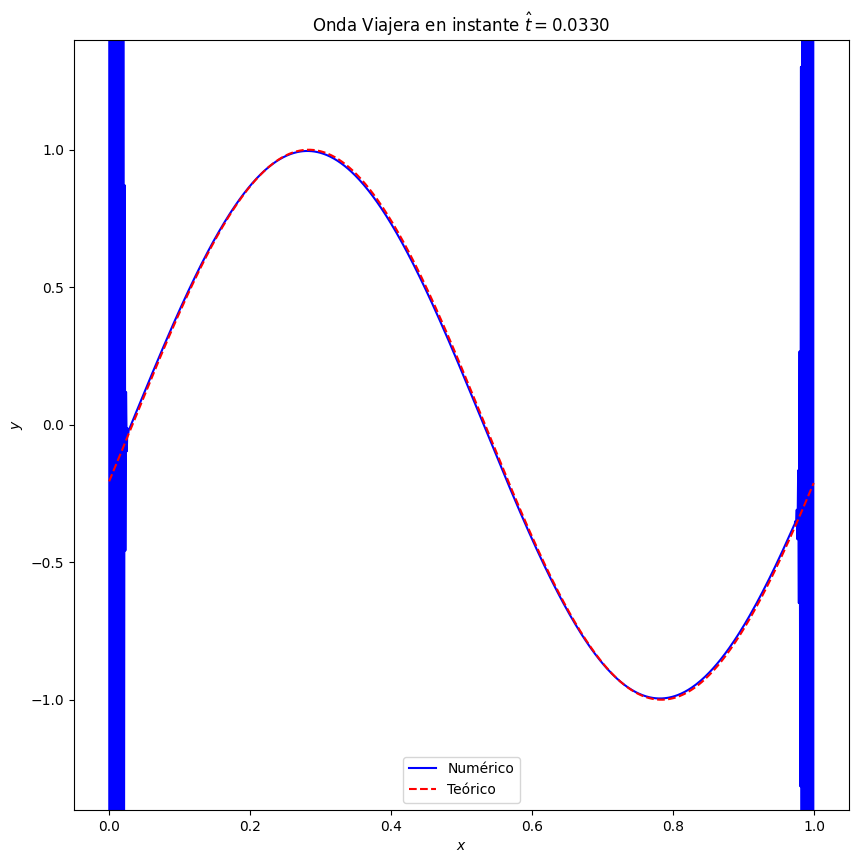

In [44]:
st_lf(method = '1.1')

# P2: Von Neumann para FTCS

* En el esta pregunta se pide demostrar que el método FTCS (Forward Time Centered Space) para el problema de difusión requiere que el parámetro $\alpha$, definido a continuación, cumpla la siguiente relación:

$$
\alpha \equiv \frac{D \Delta t}{\Delta x^2} \leq \frac{1}{2}
$$

* Para combrobar esto, haremos uso del criterio de Von Neumann para estabilidad, usando $\hat u^n_j = \mathcal{E}^n e^{ik\Delta x j}$, aplicándolo a la siguiente recurrencia para FTCS en el problema de difusión:

$$
\begin{aligned}
&&\hat u^{n+1}_j - \hat u^n_j &= \alpha (\hat u^n_{j-1} - 2 \hat u^n_j + \hat u^n_{j+1}) & \\
&\implies &\mathcal{E}^{n+1} e^{ik\Delta x j} &= \alpha (\mathcal{E}^{n} e^{ik\Delta x (j-1)} -2 \mathcal{E}^{n} e^{ik\Delta x j} + \mathcal{E}^{n} e^{ik\Delta x (j+1)}) \\
&\implies &\mathcal{E}^{n} e^{ik\Delta x j} (\mathcal{E} - 1) &= \alpha \mathcal{E}^{n} e^{ik\Delta x j}(e^{-ik\Delta x} - 2 + e^{ik\Delta x}) \\
&\implies &\mathcal{E} - 1 &= \alpha (e^{-ik\Delta x} + e^{ik\Delta x} - 2) \\
\end{aligned}
$$

* Como la suma de las dos exponenciales en el paréntesis tributa un $2\cos{k \Delta x}$, se tiene:

$$
\begin{aligned}
&&\mathcal{E} - 1 &= \alpha (e^{-ik\Delta x} + e^{ik\Delta x} - 2) \\
&\implies &\mathcal{E} &= 1 + 2 \alpha (\cos{k \Delta x} - 1) \\
&\implies &\mathcal{E} &= 1 - 2 \alpha (1 - \cos{k \Delta x}) \\
&\implies &\mathcal{E} &= 1 - 4 \alpha (\sin^2{\frac{k\Delta x}{2}}) \\
\end{aligned}
$$

* De esta relación, podemos notar que el seno está en [0, 1], siendo el uno el caso relevante, pues la condición de Von Neumann para estabilidad requiere $|\mathcal{E}| \leq 1$. e esta manera, necesitamos que se cumpla la siguiente desigualdad para asegurar la estabilidad, y que la resta no sea menor que $-1$:

$$
\begin{aligned}
&&4 \alpha &\leq 2 \\
&\implies & \alpha &\leq \frac{1}{2} \\
\end{aligned}
$$

* Y se consigue la relación que se buscaba demostrar. 


# P3: Estabilidad Incondicional de Crank Nicholson

M= 126


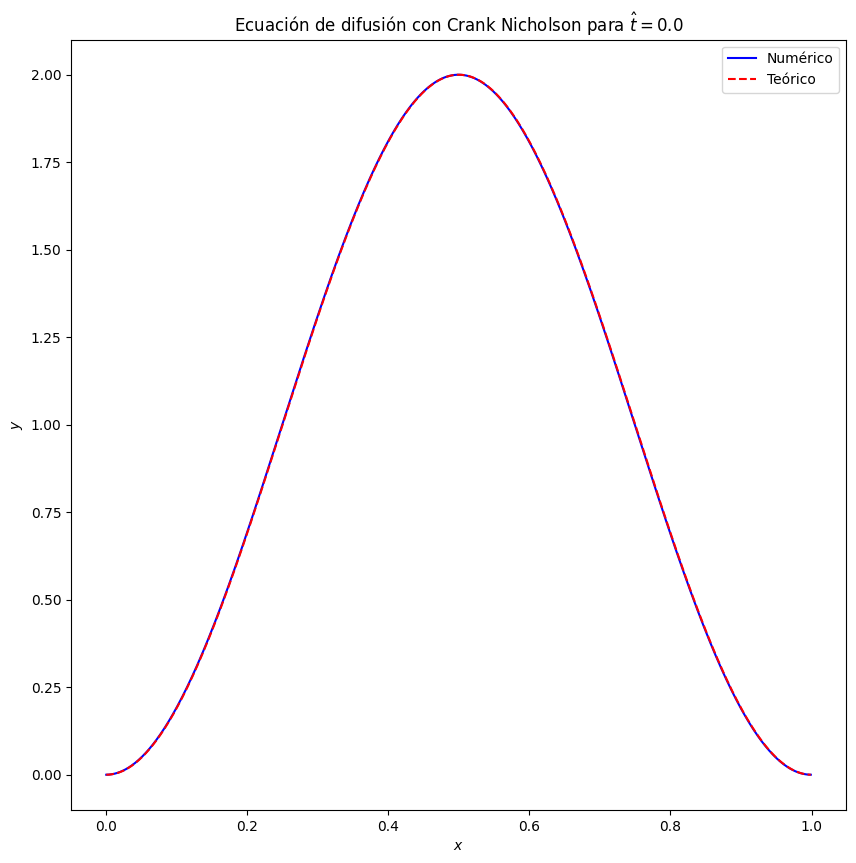

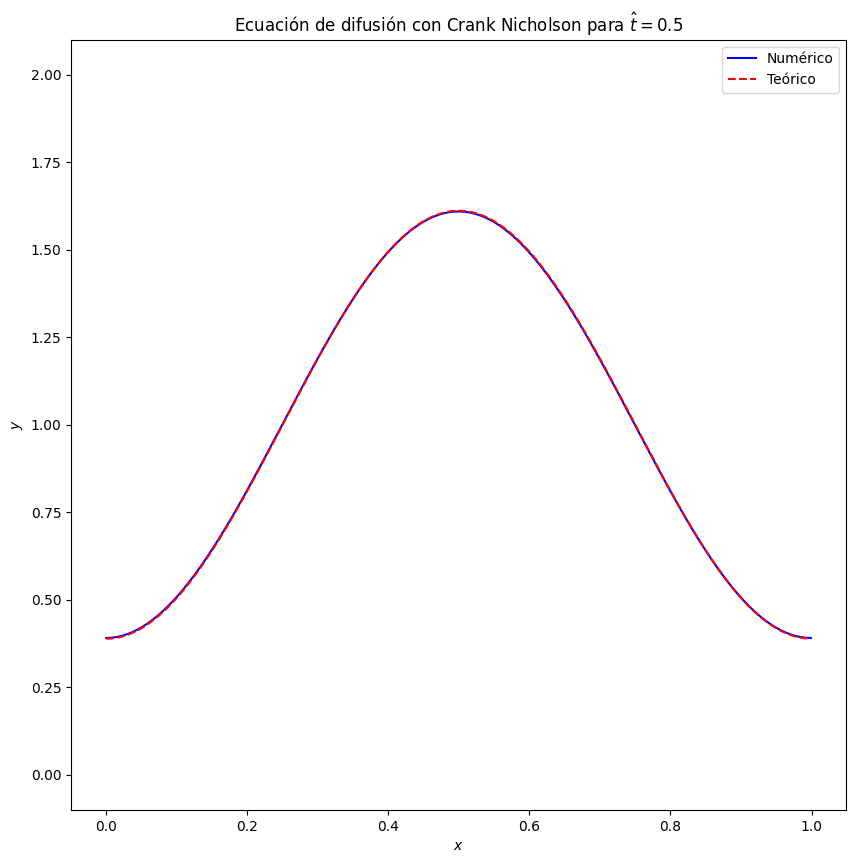

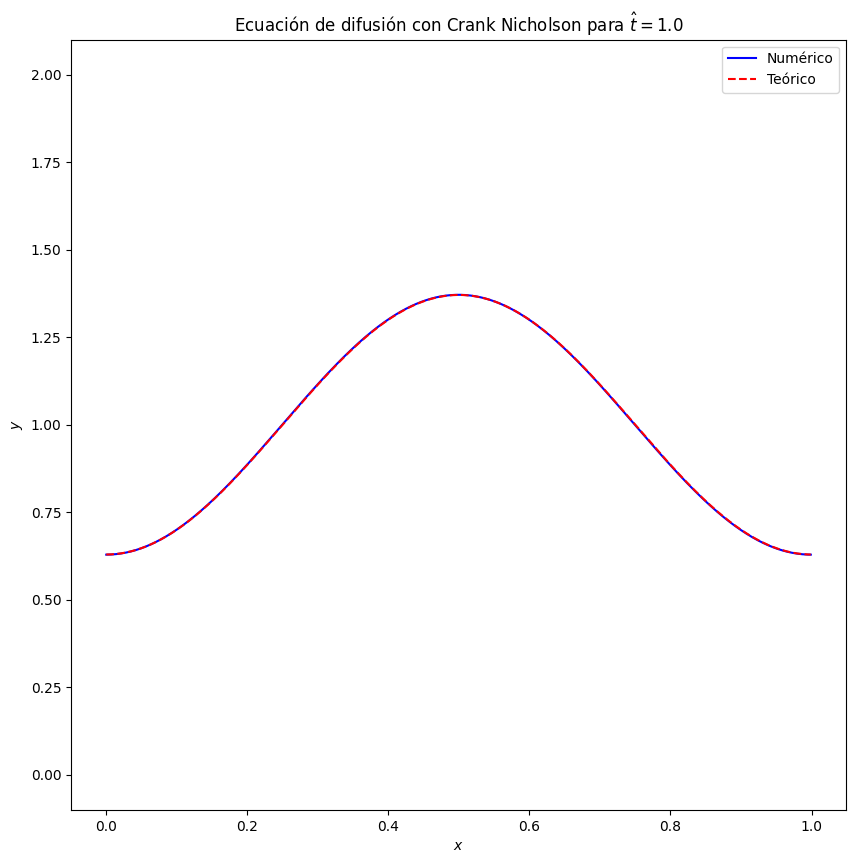

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import math

N=1000
alpha=200.
M=int(N**2/(alpha*4*math.pi**2))
print('M=',M)
v=np.empty(N)
v_theo=np.empty(N)
xs=np.empty(N)
A = np.empty((N,N))
x = np.empty(N)
y = np.empty(N)
for i in range(N):
    for j in range(N):
        if i == j:
            A[i,j] = 1+2*alpha
        else:
            if abs(i-j) == 1:
                A[i,j] = -alpha
            else:
                A[i,j] = 0.
A[0,0] = 1+alpha
A[N-1,N-1] = 1+alpha

A_1 = np.linalg.inv(A)

for i in range(N):
    v[i] = 1. - np.cos((i+.5)*2*math.pi/N)
    v_theo[i] = 1 - np.cos(2*math.pi*i/N)
    xs[i] = i/N
count=0
for t in range(M + 1):
    if t in (0, int(M/2), M):
        plt.figure(figsize=(10,10))
        plt.xlabel('$x$')
        plt.ylabel('$y$')
        plt.ylim(-.1,2.1)
        plt.plot(xs,v,color='blue', label = 'Numérico')
        plt.plot(xs,v_theo,color='red',linestyle='dashed', label = 'Teórico')
        plt.title(rf'Ecuación de difusión con Crank Nicholson para $\hat{{t}} = {t/M}$')
        plt.legend()
        plt.show()
    v = np.dot(v, A_1)           
    for i in range(N):
        v_theo[i] = 1 - np.cos(2*math.pi*i/N)*np.exp(-t/M)